In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

dataset = pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [24]:
dataset = dataset.drop("User ID", axis = 1)
dataset = pd.get_dummies(dataset, drop_first = True, dtype = int)
dataset.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [25]:
independent = dataset.drop(columns = ['Purchased'])
dependent = dataset[['Purchased']]
dependent.value_counts()

Purchased
0            257
1            143
Name: count, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size = 0.30, random_state = 0) 
x_train, x_test, y_train, y_test

(     Age  EstimatedSalary  Gender_Male
 92    26            15000            1
 223   60           102000            1
 234   38           112000            0
 232   40           107000            1
 377   42            53000            0
 ..   ...              ...          ...
 323   48            30000            0
 192   29            43000            1
 117   36            52000            1
 47    27            54000            0
 172   26           118000            0
 
 [280 rows x 3 columns],
      Age  EstimatedSalary  Gender_Male
 132   30            87000            1
 309   38            50000            0
 341   35            75000            1
 196   30            79000            0
 246   35            50000            0
 ..   ...              ...          ...
 216   49            65000            1
 259   45           131000            0
 49    31            89000            0
 238   46            82000            0
 343   47            51000            0
 
 [120 rows 

In [32]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)  

print("Accuracy:{r:1.2}".format(r = accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n", cm)
print("Classification report:\n", clf_report)

Accuracy:0.89
Confusion Matrix:
 [[74  5]
 [ 8 33]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92        79
           1       0.87      0.80      0.84        41

    accuracy                           0.89       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.89      0.89      0.89       120



In [33]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)  

print("Accuracy:{r:1.2}".format(r = accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n", cm)
print("Classification report:\n", clf_report)

Accuracy:0.68
Confusion Matrix:
 [[68 11]
 [28 13]]
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.86      0.78        79
           1       0.54      0.32      0.40        41

    accuracy                           0.68       120
   macro avg       0.62      0.59      0.59       120
weighted avg       0.65      0.68      0.65       120



In [34]:
from sklearn.naive_bayes import BernoulliNB
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
x_train_res, y_train_res = ros.fit_resample(x_train, y_train)

classifier = BernoulliNB()
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)  

print("Accuracy:{r:1.2f}".format(r = accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n", cm)
print("Classification report:\n", clf_report)

Accuracy:0.50
Confusion Matrix:
 [[37 42]
 [18 23]]
Classification report:
               precision    recall  f1-score   support

           0       0.67      0.47      0.55        79
           1       0.35      0.56      0.43        41

    accuracy                           0.50       120
   macro avg       0.51      0.51      0.49       120
weighted avg       0.56      0.50      0.51       120



In [35]:
from sklearn.naive_bayes import ComplementNB
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=0)
# x_train_res, y_train_res = ros.fit_resample(x_train, y_train)

classifier = ComplementNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)  

print("Accuracy:{r:1.2f}".format(r = accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n", cm)
print("Classification report:\n", clf_report)

Accuracy:0.53
Confusion Matrix:
 [[42 37]
 [20 21]]
Classification report:
               precision    recall  f1-score   support

           0       0.68      0.53      0.60        79
           1       0.36      0.51      0.42        41

    accuracy                           0.53       120
   macro avg       0.52      0.52      0.51       120
weighted avg       0.57      0.52      0.54       120



In [36]:
from sklearn.naive_bayes import CategoricalNB
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=0)
# x_train_res, y_train_res = ros.fit_resample(x_train, y_train)

classifier = CategoricalNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)  

print("Accuracy:{r:1.2f}".format(r = accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n", cm)
print("Classification report:\n", clf_report)

Accuracy:0.90
Confusion Matrix:
 [[76  3]
 [ 9 32]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93        79
           1       0.91      0.78      0.84        41

    accuracy                           0.90       120
   macro avg       0.90      0.87      0.88       120
weighted avg       0.90      0.90      0.90       120



Accuracy:0.90
Confusion Matrix:
 [[76  3]
 [ 9 32]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93        79
           1       0.91      0.78      0.84        41

    accuracy                           0.90       120
   macro avg       0.90      0.87      0.88       120
weighted avg       0.90      0.90      0.90       120



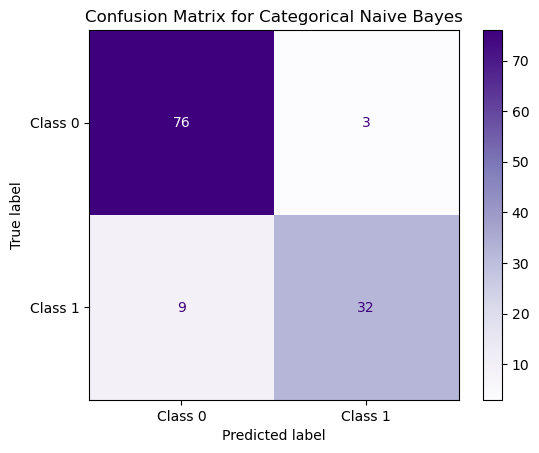

In [38]:
best_classifier = CategoricalNB()
best_classifier.fit(x_train, y_train)
y_pred = best_classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

print("Accuracy:{r:1.2f}".format(r = accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n", cm)
print("Classification report:\n", clf_report)

from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Purples")
plt.title("Confusion Matrix for Categorical Naive Bayes")
plt.grid(False)
plt.show()

In [39]:
best_classifier.predict([[40,30000,1]])

array([0], dtype=int64)